# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
btc_response = requests.get (btc_url).json()
eth_response = requests.get (eth_url).json ()

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $22310.80
The current value of your 5.3 ETH is $6959.11


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = 'v2')

In [9]:
# Format current date as ISO format
today = pd.Timestamp('2022-11-07', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stocks = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today

).df

spy = df_stocks[df_stocks['symbol'] == 'SPY'].drop('symbol', axis = 1)
agg = df_stocks[df_stocks['symbol'] == 'AGG'].drop('symbol', axis = 1)

df_stocks = pd.concat([spy,agg], axis = 1, keys = ['SPY', 'AGG'])

# Preview DataFrame
# YOUR CODE HERE!
df_stocks

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-11-07 05:00:00+00:00  377.71  380.57  375.53  379.95  68127819   

                                                    AGG                       \
                          trade_count       vwap   open   high    low  close   
timestamp                                                                      
2022-11-07 05:00:00+00:00      478350  378.30676  94.41  94.46  94.03  94.04   

                                                          
                            volume trade_count      vwap  
timestamp                                                 
2022-11-07 05:00:00+00:00  7591092       23399  94.15272

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_stocks['AGG']['close'])
spy_close_price = float(df_stocks['SPY']['close'])

# Print AGG and SPY close prices
print(f'Current AGG closing price: ${agg_close_price}')
print(f'Current SPY closing price: ${spy_close_price}')

Current AGG closing price: $94.04
Current SPY closing price: $379.95


In [13]:
# Compute the current value of shares
# YOUR CODE HERE!

# Print current value of shares
#print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
#print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

### Savings Health Analysis

In [15]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
my_crypto_value = my_btc_value + my_eth_value
my_stock_value = (my_spy * spy_close_price) ++ (my_agg * agg_close_price)

data = {'Amount' :[my_crypto_value, my_stock_value]}
df_savings = pd.DataFrame(data, index = ['crypto', 'shares'])

# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

,Amount
crypto,29269.908
shares,37805.500


<AxesSubplot:ylabel='Amount'>

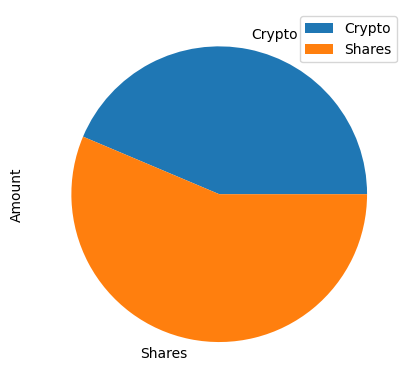

In [23]:
# Plot savings pie chart
# YOUR CODE HERE!
dataframe = pd.DataFrame({'Asset': ['Crypto', 'Shares'], 'Amount': [my_crypto_value, my_stock_value]})

dataframe.groupby(['Asset']).sum().plot(kind='pie', y='Amount')
            

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_crypto_value + my_stock_value
# YOUR CODE HERE!
total_savings = my_crypto_value + my_stock_value
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print ('Congratulations, you are doing excellent!')
elif total_savings == emergency_fund:
           print('Congratulations, you have reached your goal@')
else:
    print ('Man, you need to step it up')

Congratulations, you are doing excellent!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")